# Imports and Setup 

In [9]:

import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O
import glob
import keras
import cv2
from keras.layers import Input  # Add this import statement at the top of your code
from sklearn.utils import shuffle
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading Data

In [10]:
gen = [glob.glob('../data/forgery-detection/Dataset/dataset1/real/*.*'),
       glob.glob('../data/forgery-detection/Dataset/dataset2/real/*.*'),
       glob.glob('../data/forgery-detection/Dataset/dataset3/real/*.*'),
       glob.glob('../data/forgery-detection/Dataset/dataset4/real1/*.*')]


forg = [glob.glob('../data/forgery-detection/Dataset/dataset1/forge/*.*'),
        glob.glob('../data/forgery-detection/Dataset/dataset2/forge/*.*'),
        glob.glob('../data/forgery-detection/Dataset/dataset3/forge/*.*'),
        glob.glob('../data/forgery-detection/Dataset/dataset4/forge/*.*')]


# Preparing Data for Training

In [11]:
train_data = []
train_labels = []
test_data = []
test_labels = []

# Load and process genuine data (real signatures)
for data in range(len(gen)):
    for i in gen[data]:
        print(f"Processing genuine image: {i}")  # Debug: Check which image is being processed
        image = cv2.imread(i)
        
        if image is None:
            print(f"Error loading image {i}")  # Debug: Check if image is loaded correctly
            continue
            
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        
        if data == 3:
            test_data.append(image)
            test_labels.append(0)
        else:
            train_data.append(image)
            train_labels.append(0)  # Genuine = 0

# Load and process forged data
for data in range(len(forg)):
    for j in forg[data]:
        print(f"Processing forged image: {j}")  # Debug: Check which image is being processed
        image = cv2.imread(j)
        
        if image is None:
            print(f"Error loading image {j}")  # Debug: Check if image is loaded correctly
            continue
            
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        
        if data == 3:
            test_data.append(image)
            test_labels.append(1)
        else:
            train_data.append(image)
            train_labels.append(1)  # Forged = 1

# Debug: Print out the number of images loaded
print(f"Number of training images: {len(train_data)}")
print(f"Number of training labels: {len(train_labels)}")
print(f"Number of test images: {len(test_data)}")
print(f"Number of test labels: {len(test_labels)}")


Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/01103011.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00503005.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00302003.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00403004.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/01200012.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00504005.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00801008.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00604006.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/01000010.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00202002.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00401004.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02104021.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02204022.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02805028.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01301013.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02505025.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01802018.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02402024.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02705027.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02102021.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01202012.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02005020.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00802008.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00902009.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02702027.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01304013.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00101001.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/03002030.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00102001.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01004010.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02401024.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01702017.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02502025.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01302013.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01705017.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02504025.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00703007.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01001010.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01701017.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00301003.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01401014.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01603016.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02603026.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00502005.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01101011.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02601026.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01505015.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00903009.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00601006.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00103001.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01602016.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00904009.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00204002.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02501025.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02004020.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01904019.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01003010.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01804018.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01405014.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01805018.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/07103071.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/01601016.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/02404024.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/01604016.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/04602046.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/07705077.png
Processing genuine image: ../data/for

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00404007.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00104029.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00105026.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00104028.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01103012.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00505022.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00403013.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00501015.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01302017.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00103019.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/02301008.png
Processing forged image: ../data/forgery-de

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/08803004.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/02503010.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00105029.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00104030.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00101014.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00101028.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/02502010.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00303002.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00103026.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00301001.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00702023.png
Processing forged image: ../data/forgery-de

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00105025.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/02305008.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00302009.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00103029.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/08805004.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00104019.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00101019.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00504015.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00404024.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00402007.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00303005.png
Processing forged image: ../data/forgery-de

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00301002.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00304018.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00102030.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00403003.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00102025.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00401024.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01301017.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00105019.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/02303008.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00403024.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00104026.png
Processing forged image: ../data/forgery-de

libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01701020.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00101029.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00403007.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01101012.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00304001.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00404003.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01303017.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00401003.png
Processing forged image: ../data/forgery-detection/Dataset/dataset4/forge/01605033.png
Processing forged image: ../data/forgery-detection/Dataset/dataset4/forge/01604089.png
Processing forged image: ../data/forgery-detection/Dataset/dataset4/forge/00402044.png
Processing forged image: ../data/forgery-de

# Normalizing the Images

In [12]:
# Normalize pixel values to [0, 1]
train_data = np.array(train_data) / 255.0
train_labels = np.array(train_labels)
test_data = np.array(test_data) / 255.0
test_labels = np.array(test_labels)

# Shuffle the dataset
train_data, train_labels = shuffle(train_data, train_labels)
test_data, test_labels = shuffle(test_data, test_labels)

print(f"Number of training samples: {len(train_data)}")
print(f"Number of training labels: {len(train_labels)}")



Number of training samples: 540
Number of training labels: 540


# Data Augmentation

In [13]:

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_data)  # Apply the augmentation to the training data

# Defining the Model

In [14]:
# Load VGG16 pre-trained model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model to avoid retraining them
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global Average Pooling layer
    layers.Dense(128, activation='relu'),  # Dense layer for classification
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(2, activation='softmax')  # Output layer (2 classes: genuine or forged)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

2024-12-30 20:06:56.858460: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,610 (56.38 MB)

 Trainable params: 65,922 (257.51 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Define Callbacks

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set up callbacks
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
checkpoint_callback = ModelCheckpoint('model_best.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)


# Model Training

In [16]:
EPOCHS = 30  # Increased epochs for better learning
BS = 32  # Increased batch size

progress = model.fit(datagen.flow(train_data, train_labels, batch_size=BS),
                     epochs=EPOCHS, 
                     validation_data=(test_data, test_labels),
                     callbacks=[checkpoint_callback, earlyStopping])


/home/mrigank/miniconda3/envs/fraud-detection/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5360 - loss: 0.8088
Epoch 1: val_loss improved from inf to 0.70511, saving model to model_best.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.5355 - loss: 0.8083 - val_accuracy: 0.4278 - val_loss: 0.7051
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5243 - loss: 0.7579
Epoch 2: val_loss improved from 0.70511 to 0.70180, saving model to model_best.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.5248 - loss: 0.7570 - val_accuracy: 0.4333 - val_loss: 0.7018
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5306 - loss: 0.7651
Epoch 3: val_loss improved from 0.70180 to 0.69954, saving model to model_best.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.5303 - loss: 0.7649 - val_accuracy: 0.4778 - val_loss: 0.6995
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4877 - loss: 0.7498
Epoch 4: val_loss improved from 0.69954 to 0.69729, saving model to mod

# Plot Training , Validation Accuracy Loss

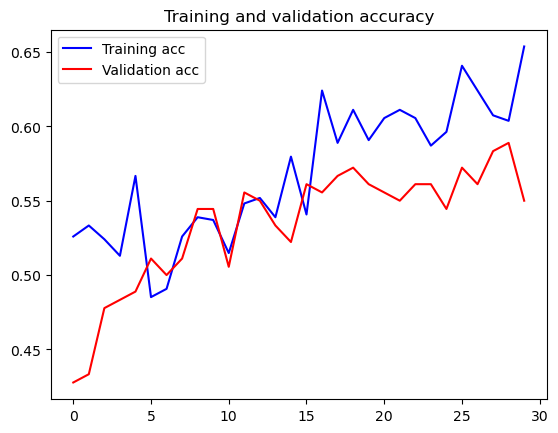

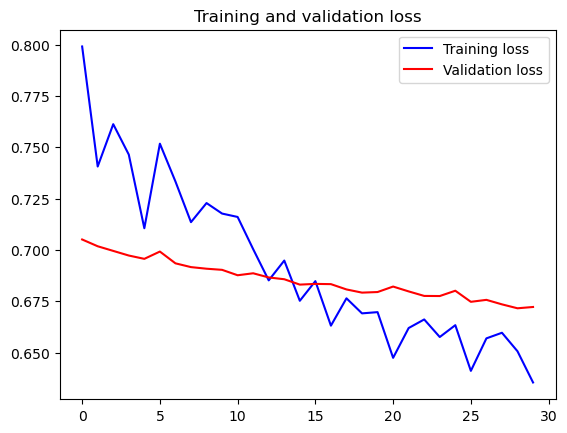

In [17]:
# Plot training and validation accuracy and loss
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']

epochs = range(len(acc))

# Plot accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Plot loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate The Model

In [18]:
# Evaluate the model on the test data
pred = model.predict(test_data)

# Convert predictions to labels
pred_labels = pred.argmax(axis=1)

# Evaluate accuracy
accuracy = accuracy_score(test_labels, pred_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Evaluate precision, recall, and f1-score
print(classification_report(test_labels, pred_labels))

# Confusion Matrix
cm = confusion_matrix(test_labels, pred_labels)
print(f'Confusion Matrix:\n{cm}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step
Accuracy: 58.89%
              precision    recall  f1-score   support

           0       0.68      0.33      0.45        90
           1       0.56      0.84      0.67        90

    accuracy                           0.59       180
   macro avg       0.62      0.59      0.56       180
weighted avg       0.62      0.59      0.56       180

Confusion Matrix:
[[30 60]
 [14 76]]


# Predict on a Single Image

In [19]:
from tensorflow.keras.models import load_model

# Load the trained model (if not already done)
model = load_model('model_best.keras')  # Use the correct path to your saved model

def predict_image(image_path, model):
    # Load the image from the specified path
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error loading image {image_path}")
        return None

    # Convert the image from BGR (OpenCV) to RGB (for model)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize image to match the input size the model expects (224x224)
    img = cv2.resize(img, (224, 224))

    # Normalize the image (pixel values between 0 and 1)
    img = img / 255.0

    # Expand dimensions to create a batch of 1 image (required for prediction)
    img = np.expand_dims(img, axis=0)

    # Debug: Print image shape and sample data
    print(f"Image Shape: {img.shape}")
    print(f"Sample Image Data (first pixel): {img[0][0]}")  # Print the first pixel values to inspect normalization

    # Make the prediction
    pred = model.predict(img)

    # Convert prediction to label
    predicted_class = np.argmax(pred, axis=1)

    # Map the predicted class to its corresponding label (0 for genuine, 1 for forged)
    if predicted_class == 0:
        print("Prediction: Genuine")
    else:
        print("Prediction: Forged")

    return predicted_class

# Example usage
image_path = '/home/mrigank/Documents/GitHub/adaptive-ai-fraud-prevention/02101007.png'  # Replace with your image file path
predict_image(image_path, model)


Image Shape: (1, 224, 224, 3)
Sample Image Data (first pixel): [[0.93333333 0.97647059 0.99215686]
 [0.94117647 0.98039216 0.99607843]
 [0.92941176 0.96862745 0.99607843]
 [0.92941176 0.97647059 0.99607843]
 [0.92941176 0.97254902 0.99215686]
 [0.9254902  0.96862745 0.99607843]
 [0.92941176 0.96862745 0.99607843]
 [0.93333333 0.97254902 0.99215686]
 [0.9372549  0.97647059 0.99607843]
 [0.9372549  0.98039216 0.99607843]
 [0.94117647 0.98039216 0.99607843]
 [0.93333333 0.97254902 0.99607843]
 [0.92941176 0.96862745 0.99607843]
 [0.94117647 0.98039216 0.99607843]
 [0.9372549  0.97647059 0.99607843]
 [0.94117647 0.98039216 0.99607843]
 [0.93333333 0.97647059 0.99607843]
 [0.92941176 0.96862745 0.99607843]
 [0.94509804 0.98431373 0.99215686]
 [0.95294118 0.98823529 0.98823529]
 [0.94509804 0.98431373 0.99215686]
 [0.94117647 0.98039216 0.99215686]
 [0.94901961 0.98823529 0.99215686]
 [0.94117647 0.98431373 0.99215686]
 [0.95294118 0.98823529 0.99215686]
 [0.94117647 0.98039216 0.99607843]
 

array([1])

# Export the Model as a .joblib File 

In [20]:
# Save the Keras model in HDF5 format
model.save('forgery-detection-model.h5')  # Use .h5 extension for HDF5 format
